In [1]:
import os
print ("OS Type: ", os.name)

OS Type:  nt


In [2]:
import sys

print ("OS Name: ", sys.platform)

OS Name:  win32


In [3]:
import platform

print ("OS Platform: ", platform.platform())

OS Platform:  Windows-10-10.0.22631-SP0


In [4]:
import multiprocessing

numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)


Num of cores are:  12


In [5]:

import threading

activeThread = threading.active_count()
print ("Num of threads: ",activeThread)

Num of threads:  6


In [6]:
import numpy as np
import threading
import time

In [7]:
def generate_matrices(num,size):
    matrices = []
    for _ in range(num):
        matrices.append(np.random.rand(size,size))
    return matrices

In [8]:
def multiply_matrices(constant_matrix, matrices, result, index):
    result[index] = np.dot(constant_matrix, matrices[index])

In [9]:
num_matrices = 100
matrix_size = 1000
constant_matrix = np.random.rand(matrix_size, matrix_size)

In [10]:
constant_matrix

array([[0.45956788, 0.00459553, 0.70635893, ..., 0.74139026, 0.03507121,
        0.75183941],
       [0.3547447 , 0.92230209, 0.52565661, ..., 0.30956736, 0.25061934,
        0.62376399],
       [0.69504238, 0.01971572, 0.6023758 , ..., 0.09714962, 0.00697255,
        0.15957506],
       ...,
       [0.40012706, 0.21713245, 0.39126997, ..., 0.21452754, 0.62558834,
        0.6731677 ],
       [0.08257104, 0.13386625, 0.07120852, ..., 0.58588196, 0.64297867,
        0.81592487],
       [0.5370194 , 0.66772055, 0.58670214, ..., 0.09991497, 0.60747686,
        0.83298733]])

In [11]:
time_arr=[None]*15

In [12]:
time_arr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
matrices = generate_matrices(num_matrices, matrix_size)
result = [None] * num_matrices
activeThreads=0
for num_threads in range(1, 16):
    start_time = time.time()
    threads = []
    activeThreads = threading.activeCount()
    print(f"Multiplication with {num_threads} threads:")
    for i in range(num_matrices):
        thread = threading.Thread(target=multiply_matrices, args=(constant_matrix, matrices, result, i))
        threads.append(thread)
        thread.start()
        while True:
            if threading.activeCount() - activeThreads + 1 <= num_threads:
                break
            time.sleep(1)
    while True:
        if threading.activeCount() == activeThreads:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.activeCount() - activeThreads))
            time.sleep(1)

    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - start_time,4)))
    time_arr[num_threads-1]=(round( time.time() - start_time,4))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\979209689.py:7: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  activeThreads = threading.activeCount()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\979209689.py:14: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  if threading.activeCount() - activeThreads + 1 <= num_threads:


Multiplication with 1 threads:


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\979209689.py:18: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  if threading.activeCount() == activeThreads:


 All Thread ends
Program Finished
Total Time 100.788800 sec
Multiplication with 2 threads:
 All Thread ends
Program Finished
Total Time 51.199400 sec
Multiplication with 3 threads:


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\979209689.py:21: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  print ("    Thread still running (left %d)..."%(threading.activeCount() - activeThreads))


    Thread still running (left 1)...
 All Thread ends
Program Finished
Total Time 35.939000 sec
Multiplication with 4 threads:
 All Thread ends
Program Finished
Total Time 31.143700 sec
Multiplication with 5 threads:
    Thread still running (left 3)...
 All Thread ends
Program Finished
Total Time 23.213500 sec
Multiplication with 6 threads:
    Thread still running (left 4)...
 All Thread ends
Program Finished
Total Time 18.090400 sec
Multiplication with 7 threads:
    Thread still running (left 4)...
 All Thread ends
Program Finished
Total Time 15.367700 sec
Multiplication with 8 threads:
    Thread still running (left 7)...
 All Thread ends
Program Finished
Total Time 13.379300 sec
Multiplication with 9 threads:
 All Thread ends
Program Finished
Total Time 11.048200 sec
Multiplication with 10 threads:
    Thread still running (left 6)...
 All Thread ends
Program Finished
Total Time 14.370100 sec
Multiplication with 11 threads:
    Thread still running (left 9)...
 All Thread ends
Pr

In [19]:
time_arr

[100.7888,
 51.1994,
 35.939,
 31.1437,
 23.2135,
 18.0904,
 15.3677,
 13.3793,
 11.0482,
 14.3701,
 10.4843,
 9.1431,
 8.137,
 8.3911,
 14.5163]

In [15]:
import matplotlib.pyplot as plt

In [20]:
num_threads = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]

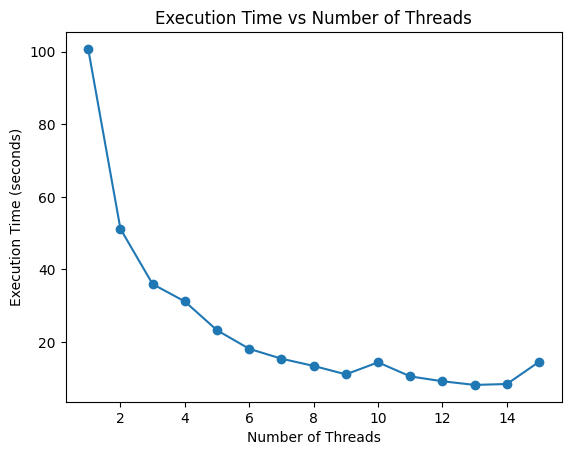

In [21]:
plt.plot(num_threads, time_arr, marker='o')

plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Threads')

plt.show()